# Property investment business model.

 ### This model will help to predict the actual value of the prospective properties and decide whether to invest in them or not.

### This model will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
#Import dataset " train.csv"

df_housing_main = pd.read_csv(r"train.csv")
df_housing_main.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## Shape of the dataset

In [5]:
df_housing_main.shape

(1460, 81)

## Checking columns present in the dataset

In [6]:
df_housing_main.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Checking information and description of data set

In [7]:
#Checking information of dataset

df_housing_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#Checking description of dataset

df_housing_main.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Observing total number of missing values of dataset

In [9]:
#missing data
df_housing_main.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Plotting scatter plot of some variables

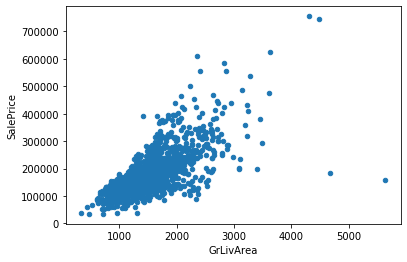

In [10]:
A = pd.concat([df_housing_main['SalePrice'], df_housing_main['GrLivArea']], axis=1)
A.plot.scatter(x='GrLivArea', y='SalePrice')

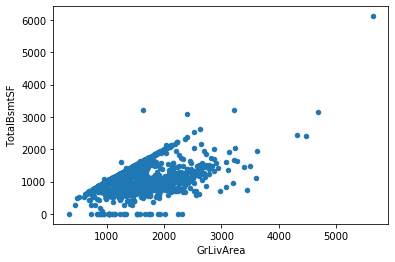

In [11]:
A = pd.concat([df_housing_main['TotalBsmtSF'], df_housing_main['GrLivArea']], axis=1)
A.plot.scatter(x='GrLivArea', y='TotalBsmtSF')

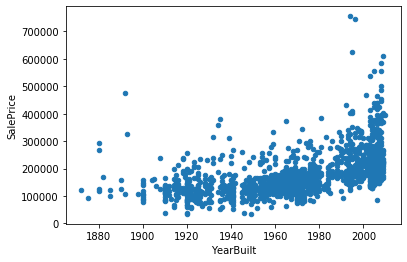

In [12]:
A = pd.concat([df_housing_main['SalePrice'], df_housing_main['YearBuilt']], axis=1)
A.plot.scatter(x='YearBuilt', y='SalePrice')

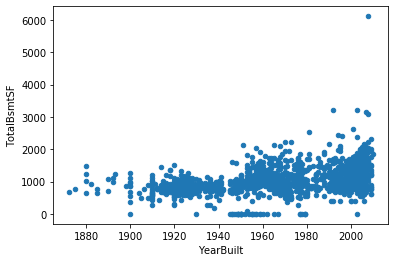

In [13]:
A = pd.concat([df_housing_main['TotalBsmtSF'], df_housing_main['YearBuilt']], axis=1)
A.plot.scatter(x='YearBuilt', y='TotalBsmtSF')

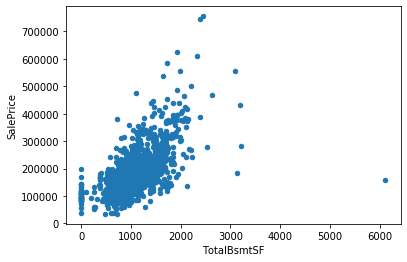

In [14]:
A = pd.concat([df_housing_main['SalePrice'], df_housing_main['TotalBsmtSF']], axis=1)
A.plot.scatter(x='TotalBsmtSF', y='SalePrice')

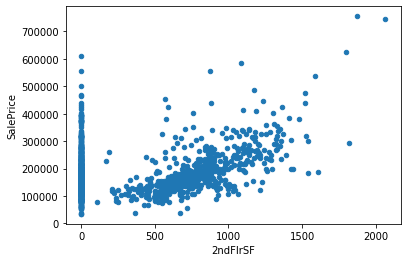

In [15]:
A = pd.concat([df_housing_main['SalePrice'], df_housing_main['2ndFlrSF']], axis=1)
A.plot.scatter(x='2ndFlrSF', y='SalePrice')

## Dropping columns having relatively high missing values

In [16]:
#Dropping columns having high missing values
df_housing_main.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu','GarageYrBlt','1stFlrSF'],axis=1,inplace=True)
#missing data
total = df_housing_main.isnull().sum().sort_values(ascending=False)
percent = (df_housing_main.isnull().sum()/df_housing_main.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

## Checking again percentage of missing values

In [17]:
missing_data

,Total,Percent
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342


## Plotting pair plot 

<Figure size 4320x4320 with 0 Axes>

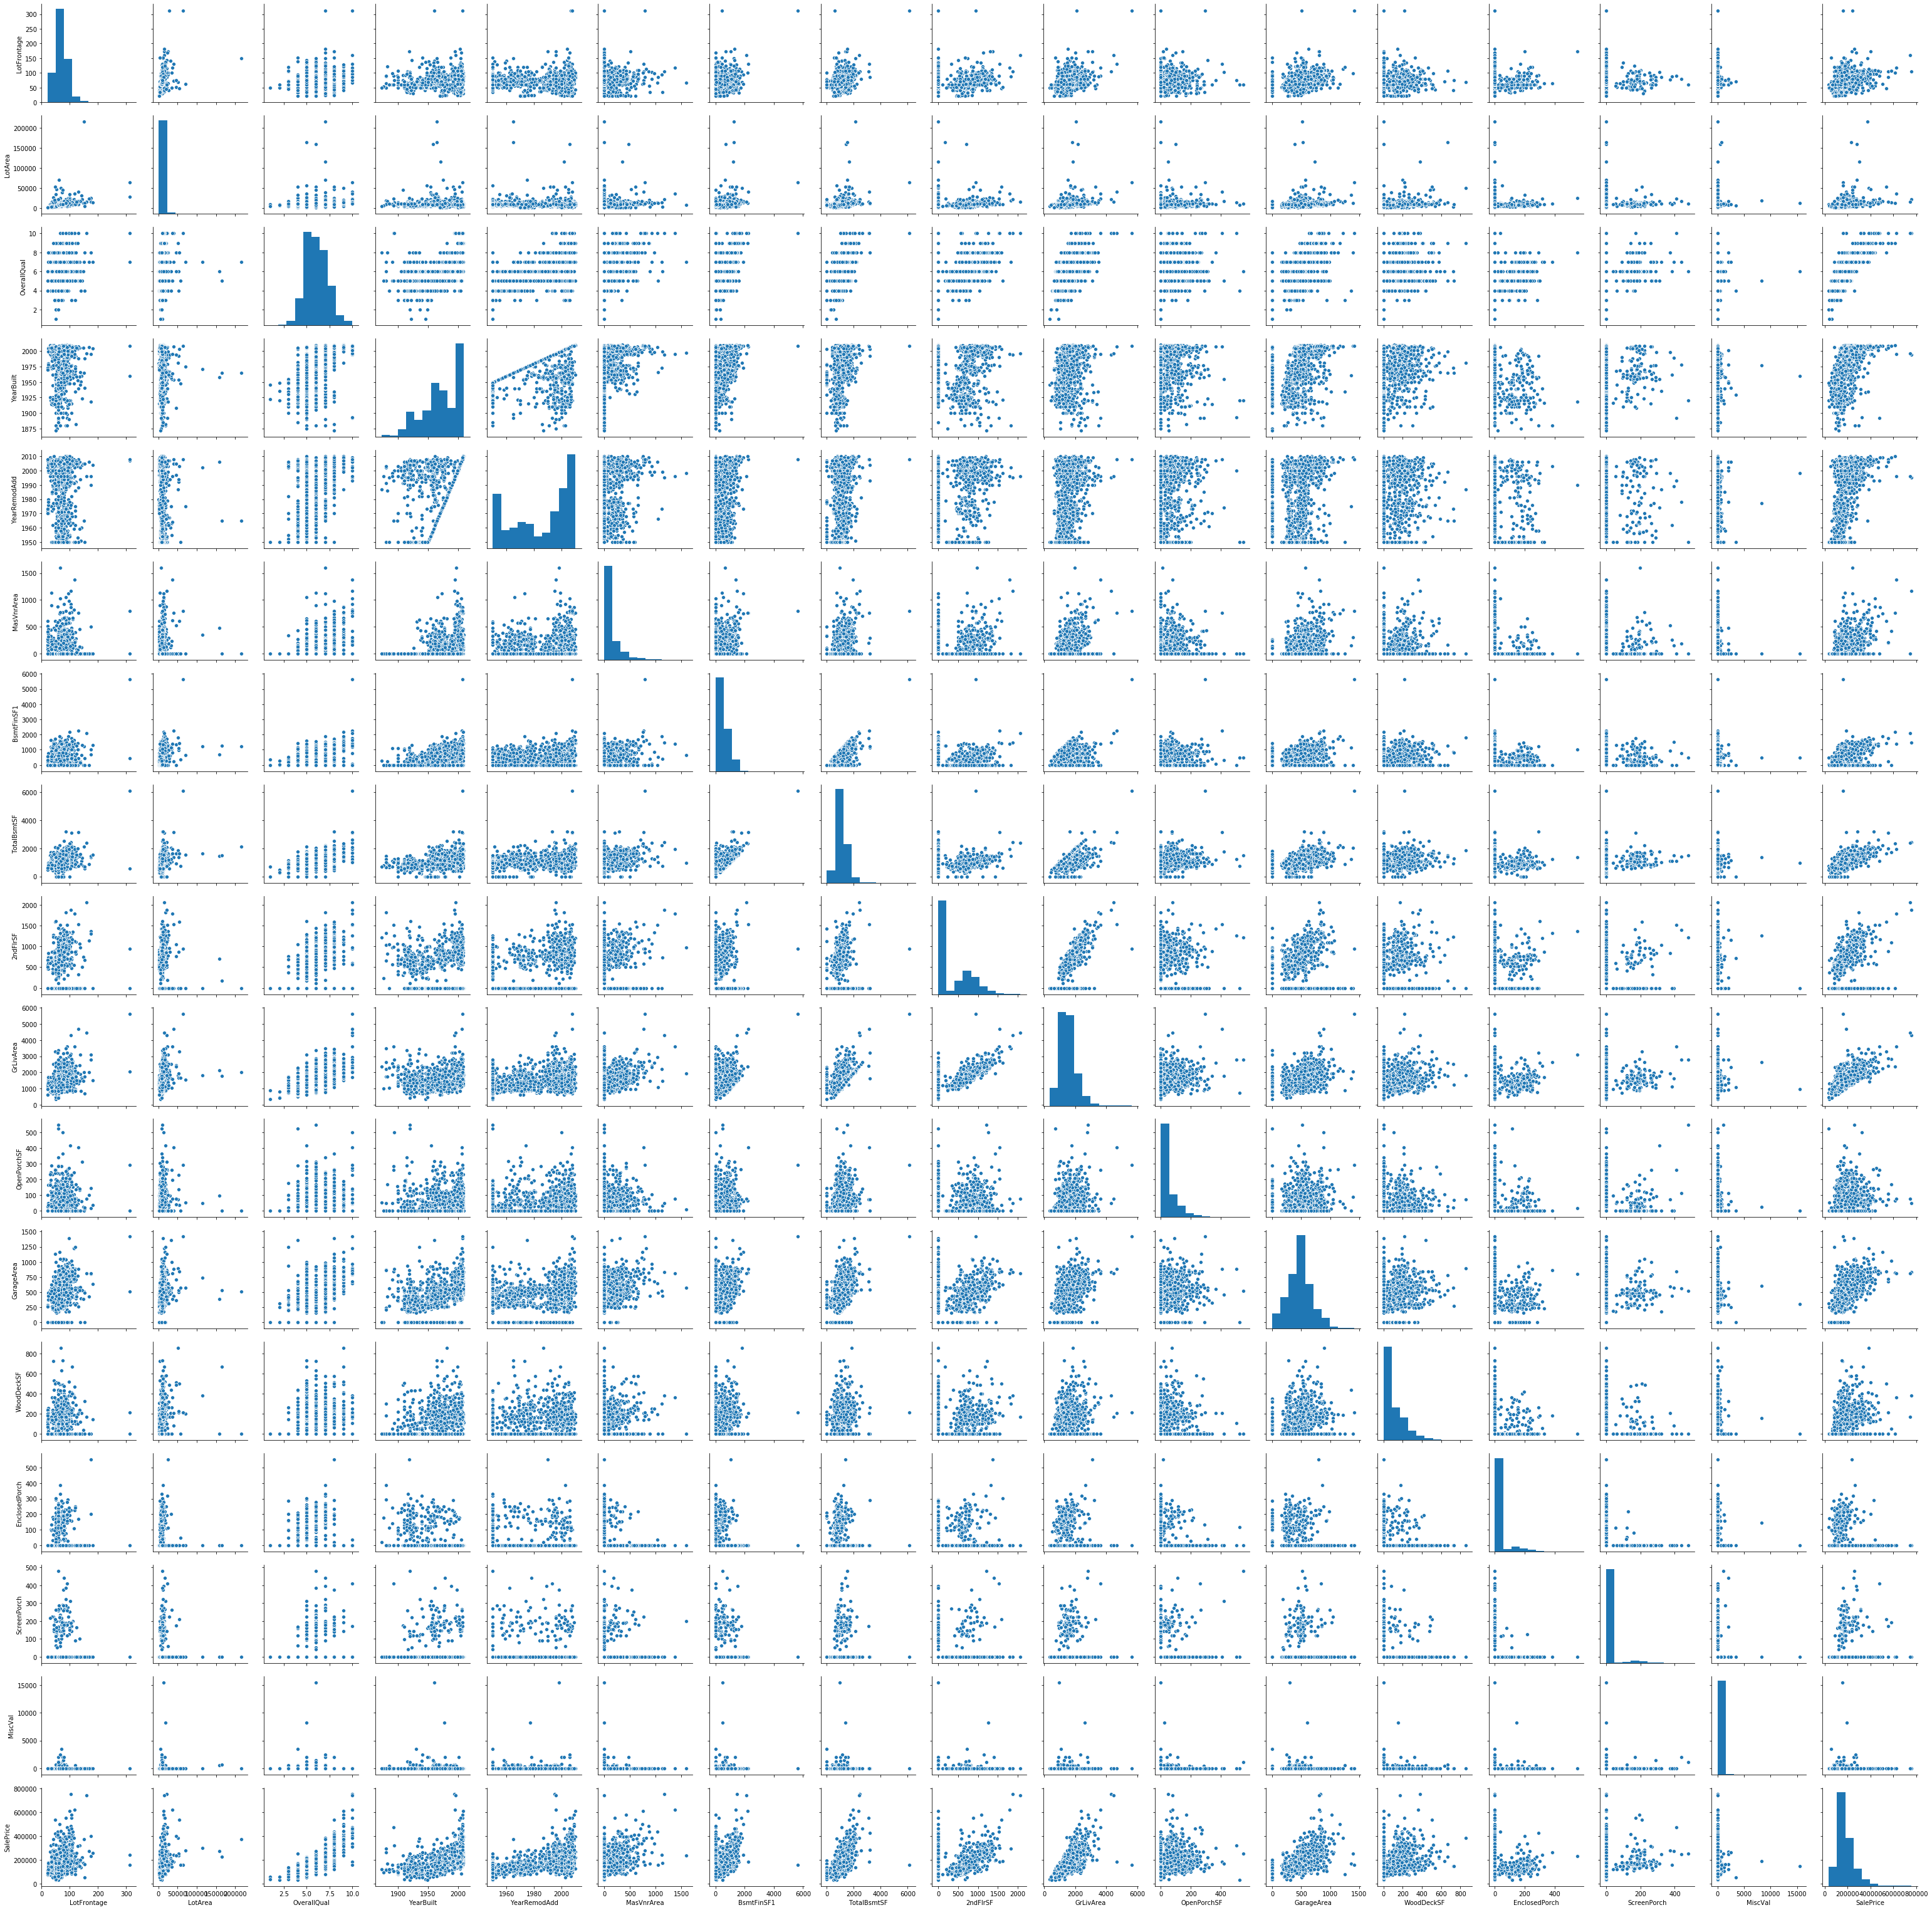

In [18]:
plt.figure(figsize = (60,60))
colums = [ 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
           'LotShape', 'LandContour', 'Utilities', 'LotConfig',
           'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
           'HouseStyle', 'OverallQual',  'YearBuilt', 'YearRemodAdd',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
           'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
           'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
           'BsmtFinType2', 'TotalBsmtSF', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
            'GrLivArea', 'KitchenQual',
            'Functional',  'GarageType','OpenPorchSF',
            'GarageFinish','GarageArea', 'GarageQual',
           'GarageCond', 'PavedDrive', 'WoodDeckSF', 
           'EnclosedPorch', 'ScreenPorch',
           'MiscVal',  'SaleType',
           'SaleCondition', 'SalePrice']
sns.pairplot(df_housing_main[colums])
plt.show();

## Plotting correlation heat map to check highly correlated variables

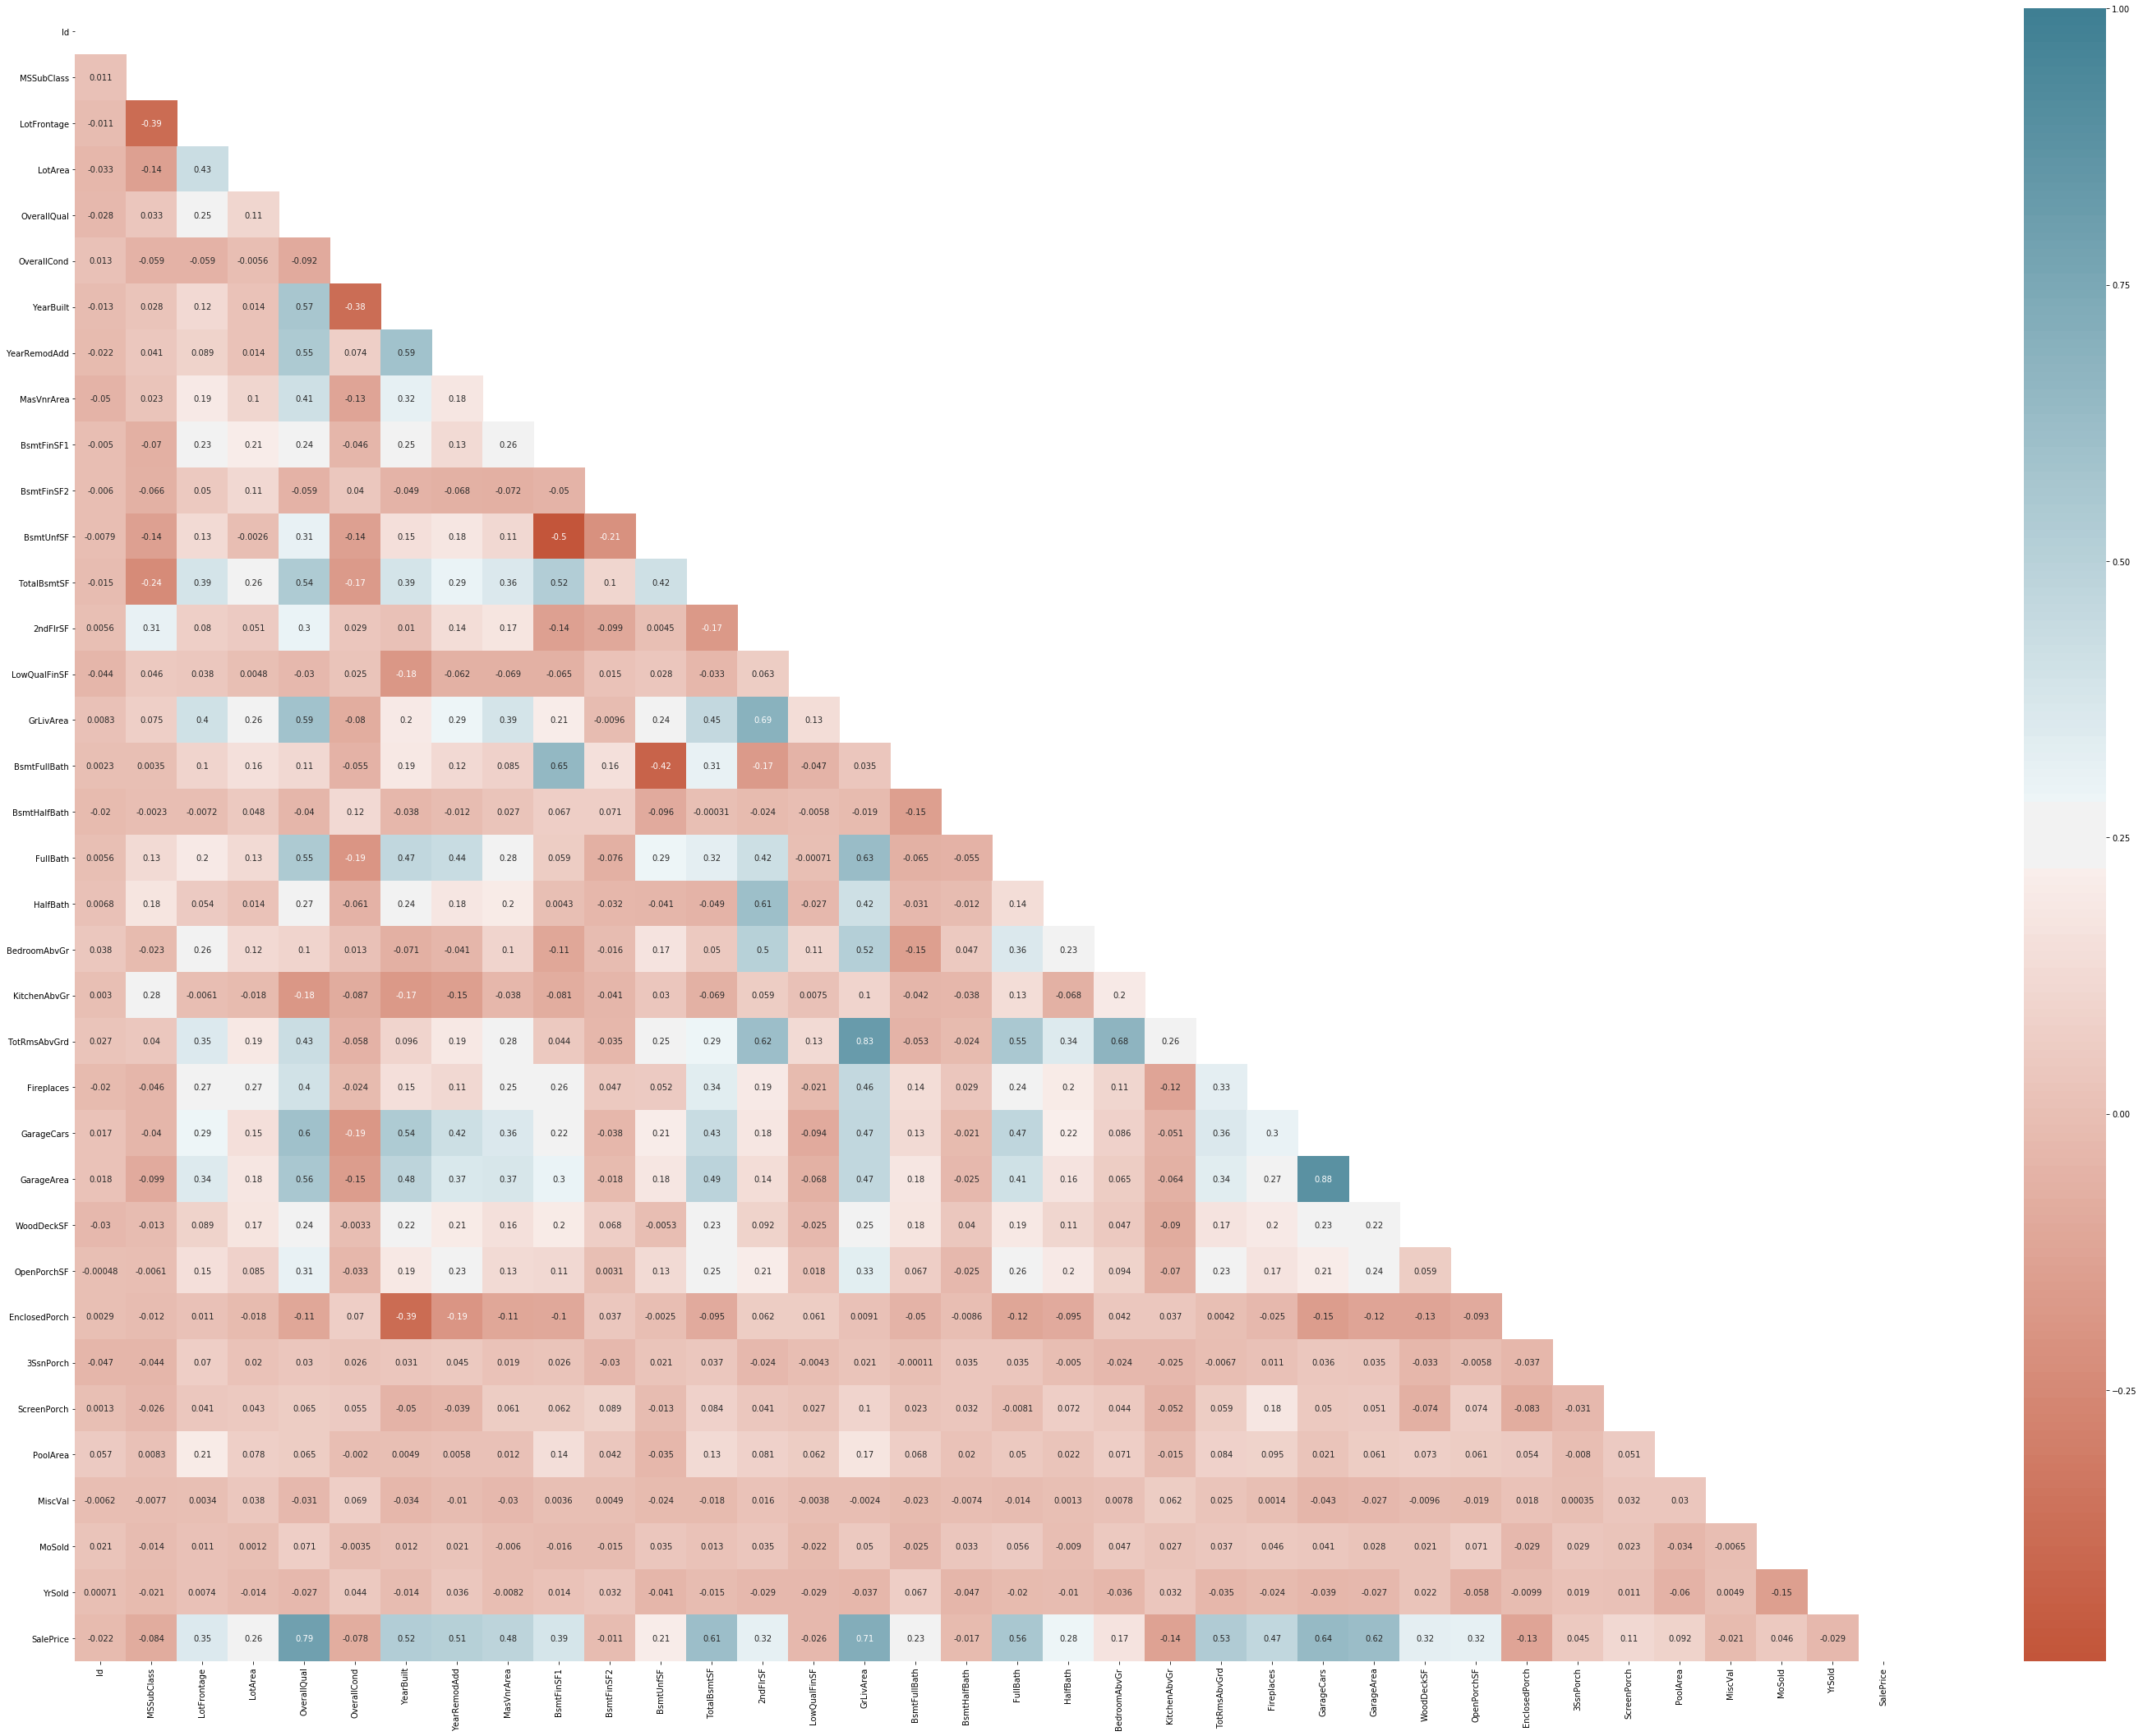

In [19]:
# Plotting the corrrelation heatmap 
#to identify highly correlated columns

plt.figure(figsize = (50, 37))
matrix = np.triu(df_housing_main.corr())
sns.heatmap(df_housing_main.corr(), annot=True, mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [20]:
# list of highly correlated variables
c = df_housing_main.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

BsmtFullBath   3SsnPorch        0.000106
3SsnPorch      BsmtFullBath     0.000106
TotalBsmtSF    BsmtHalfBath     0.000315
BsmtHalfBath   TotalBsmtSF      0.000315
MiscVal        3SsnPorch        0.000354
3SsnPorch      MiscVal          0.000354
Id             OpenPorchSF      0.000477
OpenPorchSF    Id               0.000477
FullBath       LowQualFinSF     0.000710
LowQualFinSF   FullBath         0.000710
YrSold         Id               0.000712
Id             YrSold           0.000712
LotArea        MoSold           0.001205
MoSold         LotArea          0.001205
HalfBath       MiscVal          0.001290
MiscVal        HalfBath         0.001290
ScreenPorch    Id               0.001330
Id             ScreenPorch      0.001330
Fireplaces     MiscVal          0.001409
MiscVal        Fireplaces       0.001409
PoolArea       OverallCond      0.001985
OverallCond    PoolArea         0.001985
Id             BsmtFullBath     0.002289
BsmtFullBath   Id               0.002289
MSSubClass     B

##  Removing  highly correlated variables

In [21]:
# Removing the highly corelated 
#columns by using above heatmap

df_housing_main.drop(['YearBuilt','YearRemodAdd','TotRmsAbvGrd','GrLivArea','LotFrontage','GarageCars','BsmtFullBath','FullBath','2ndFlrSF'],axis=1,inplace=True)
df_housing_main.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Plotting heat map again to check highly correlated variables

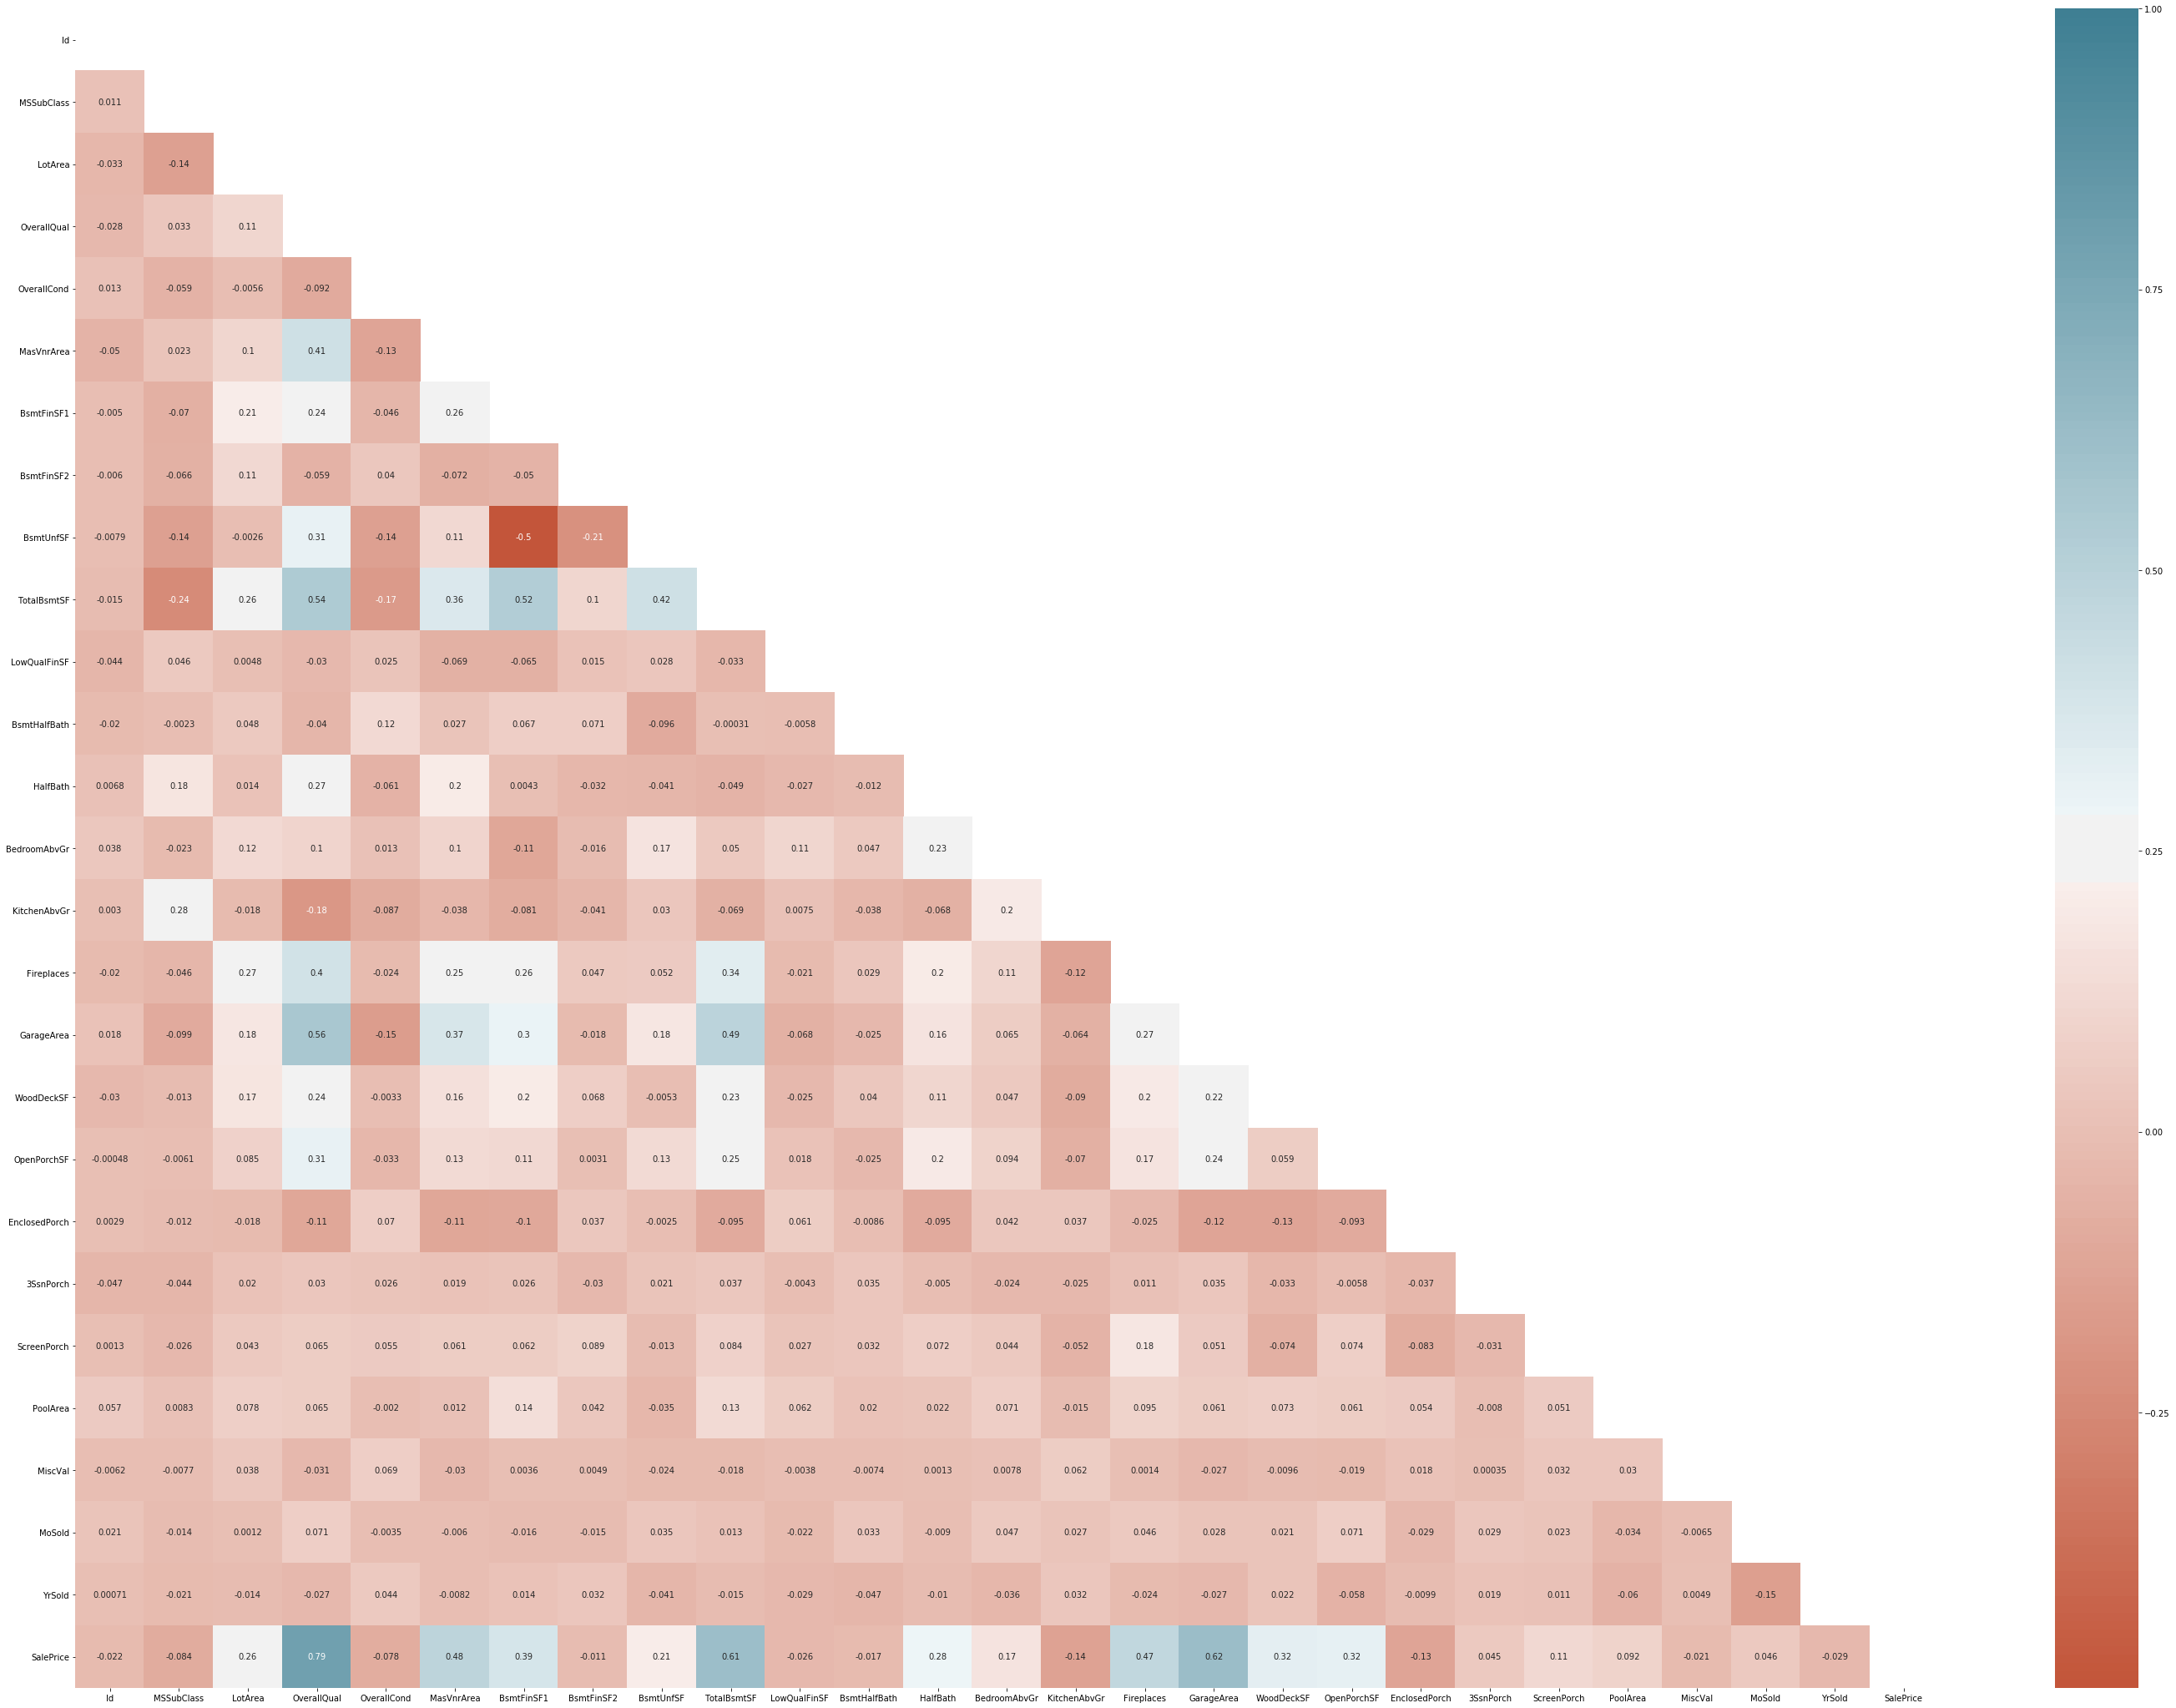

In [22]:
# Plotting the corrrelation heatmap 
#to identify highly correlated columns again 

plt.figure(figsize = (50, 37))
matrix = np.triu(df_housing_main.corr())
sns.heatmap(df_housing_main.corr(), annot=True, mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

## Checking again percentage of missing values

In [23]:
## Checking again percentage of missing values
total = df_housing_main.isnull().sum().sort_values(ascending=False)
percent = (df_housing_main.isnull().sum()/df_housing_main.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
BsmtQual,37,0.025342
MasVnrArea,8,0.005479


# Imputing missing values

#### Imputing missing values of 'BsmtFinType1'


In [24]:
# checking values before imputation

df_housing_main['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

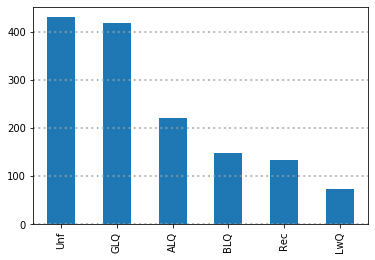

In [25]:
df_housing_main['BsmtFinType1'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [26]:
## checking after imputing the values

df_housing_main['BsmtFinType1'].fillna(df_housing_main['BsmtFinType1'].mode()[0], inplace = True)
df_housing_main['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

#### Imputing missing values of 'GarageFinish'


In [27]:
# checking values before imputation

df_housing_main['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

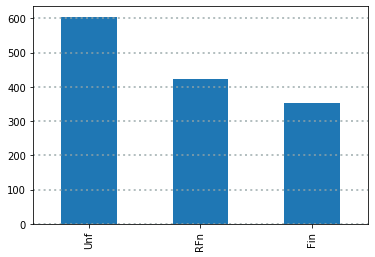

In [28]:
df_housing_main['GarageFinish'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [29]:
## checking after imputing the values
df_housing_main['GarageFinish'].fillna(df_housing_main['GarageFinish'].mode()[0], inplace = True)
df_housing_main['GarageFinish'].value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

#### Imputing missing values of 'BsmtFinType2'


In [30]:
# checking values before imputation

df_housing_main['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

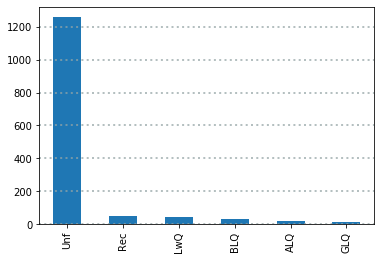

In [31]:
df_housing_main['BsmtFinType2'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()


In [32]:
## checking after imputing the values
df_housing_main['BsmtFinType2'].fillna(df_housing_main['BsmtFinType2'].mode()[0], inplace = True)
df_housing_main['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### Imputing missing values of 'BsmtQual'

In [33]:
# checking values before imputation

df_housing_main['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

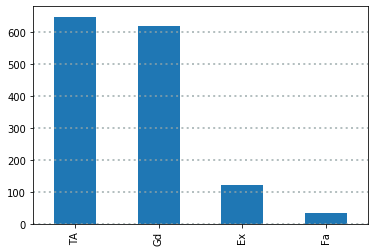

In [34]:
df_housing_main['BsmtQual'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)
plt.show()

In [35]:
## checking after imputing the values
df_housing_main['BsmtQual'].fillna(df_housing_main['BsmtQual'].mode()[0], inplace = True)
df_housing_main['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

#### Imputing missing values of 'BsmtCond'

In [36]:
# checking values before imputation

df_housing_main['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

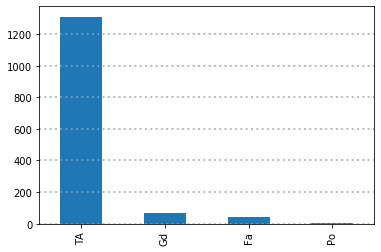

In [37]:
df_housing_main['BsmtCond'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [38]:
## checking after imputing the values
df_housing_main['BsmtCond'].fillna(df_housing_main['BsmtCond'].mode()[0], inplace = True)
df_housing_main['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

#### Imputing missing values of 'BsmtExposure'

In [39]:
# checking values before imputation

df_housing_main['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

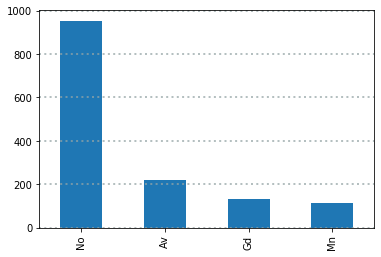

In [40]:
df_housing_main['BsmtExposure'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [41]:
## checking after imputing the values
df_housing_main['BsmtExposure'].fillna(df_housing_main['BsmtExposure'].mode()[0], inplace = True)
df_housing_main['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

#### Imputing missing values of 'Electrical'

In [42]:
# checking values before imputation

df_housing_main['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

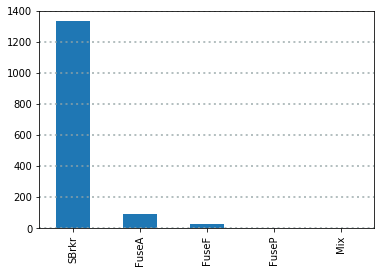

In [43]:
df_housing_main['Electrical'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [44]:
## checking after imputing the values
df_housing_main['Electrical'].fillna(df_housing_main['Electrical'].mode()[0], inplace = True)
df_housing_main['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Imputing missing values of 'GarageType'

In [45]:
# checking values before imputation

df_housing_main['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

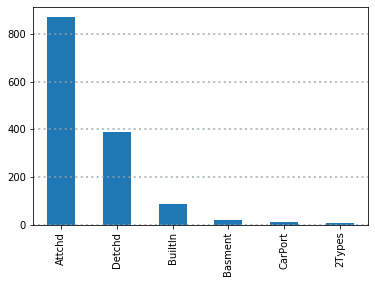

In [46]:
df_housing_main['GarageType'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [47]:
## checking after imputing the values
df_housing_main['GarageType'].fillna(df_housing_main['GarageType'].mode()[0], inplace = True)
df_housing_main['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

#### Imputing missing values of 'GarageQual'

In [48]:
# checking values before imputation

df_housing_main['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

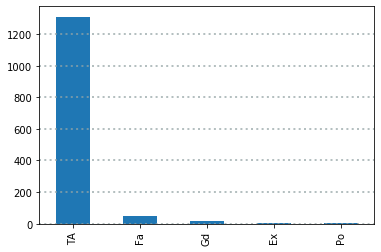

In [49]:
df_housing_main['GarageQual'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [50]:
## checking after imputing the values
df_housing_main['GarageQual'].fillna(df_housing_main['GarageQual'].mode()[0], inplace = True)
df_housing_main['GarageQual'].value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

#### Imputing missing values of  'GarageCond'

In [51]:
# checking values before imputation

df_housing_main['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

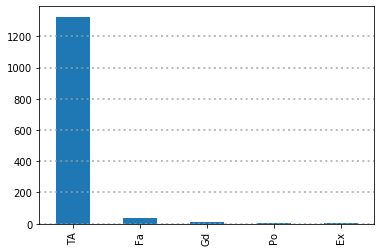

In [52]:
df_housing_main['GarageCond'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [53]:
## checking after imputing the values
df_housing_main['GarageCond'].fillna(df_housing_main['GarageCond'].mode()[0], inplace = True)
df_housing_main['GarageCond'].value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Imputing missing values of 'MasVnrType'

In [54]:
# checking values before imputation

df_housing_main['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

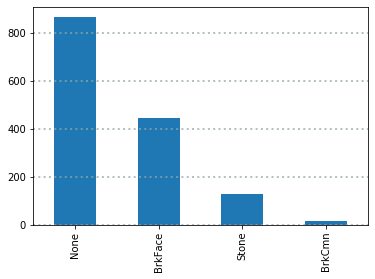

In [55]:
df_housing_main['MasVnrType'].value_counts().plot.bar()
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='y', alpha=0.7)

plt.show()

In [56]:
## checking after imputing the values

df_housing_main['MasVnrType'].fillna(df_housing_main['MasVnrType'].mode()[0], inplace = True)
df_housing_main['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [57]:
df_housing_main['MasVnrArea'].fillna(df_housing_main['MasVnrArea'].mode()[0], inplace = True)

## Checking again the presence of null values 

In [58]:
#Checking the null values of all the columns
df_housing_main.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
                ..
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
LowQualFinSF     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

## Checking the number of non null values 

In [59]:
df_housing_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 n

In [60]:
df_housing_main.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Creating dummy variables

In [61]:
list1=['LotShape',
        'LandContour',
        'LotConfig',
        'LandSlope',
        'Neighborhood',
        'Condition1',
        'Condition2',
        'BldgType',
        'HouseStyle',
        'OverallQual',
        'OverallCond',
        'RoofStyle',
        'Exterior1st',
        'Exterior2nd',
        'MasVnrType',
        'RoofMatl',
        'ExterQual',
        'ExterCond',
        'Foundation',
        'BsmtQual',
        'BsmtCond',
        'BsmtExposure',
        'BsmtFinType1',
        'BsmtFinType2',
        'Heating',
        'HeatingQC',
        'CentralAir',
        'Electrical',
        'Functional',
        'GarageType',
        'GarageFinish',
        'GarageQual',
        'GarageCond',
        'PavedDrive',
        'SaleType',
        'SaleCondition',
        'KitchenQual']
for x in list1:
    A_df =pd.get_dummies(df_housing_main[x],prefix= x ,drop_first= True)
    df_housing_main = pd.concat([df_housing_main,A_df],axis=1)
    
# Creating dummy variable
A_df =pd.get_dummies(df_housing_main['MSSubClass'],prefix='MSClass',drop_first= True)
df_housing_main = pd.concat([df_housing_main,A_df],axis=1)

# Creating dummy variable
A_df =pd.get_dummies(df_housing_main['MSZoning'],prefix='MSZone',drop_first= True)
df_housing_main = pd.concat([df_housing_main,A_df],axis=1)

## Lable encoding the variables

In [62]:
#lable encoding the variable
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df_housing_main['Street'] = le.fit_transform(df_housing_main['Street'])

#lable encoding the variable
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df_housing_main['Utilities'] = le.fit_transform(df_housing_main['Utilities'])

In [63]:
df_housing_main.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MSClass_85,MSClass_90,MSClass_120,MSClass_160,MSClass_180,MSClass_190,MSZone_FV,MSZone_RH,MSZone_RL,MSZone_RM
0,1,60,RL,8450,1,Reg,Lvl,0,Inside,Gtl,...,0,0,0,0,0,0,0,0,1,0
1,2,20,RL,9600,1,Reg,Lvl,0,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0
2,3,60,RL,11250,1,IR1,Lvl,0,Inside,Gtl,...,0,0,0,0,0,0,0,0,1,0
3,4,70,RL,9550,1,IR1,Lvl,0,Corner,Gtl,...,0,0,0,0,0,0,0,0,1,0
4,5,60,RL,14260,1,IR1,Lvl,0,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0


## Droping the variables for which we created the dummyies

In [64]:
#dropping columns for which we already created dummy variables
df_housing_main.drop(['LotShape','Condition1','Condition2','OverallCond','OverallQual','KitchenQual','MasVnrArea','Id',
                      'HouseStyle','BldgType','MasVnrType','Exterior2nd','Exterior1st',
                      'RoofStyle','OverallCond','OverallQual','HouseStyle','BsmtFinType2','BsmtFinType1','BsmtExposure',
                      'BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual','GarageQual','LandContour','LotConfig',
                      'LandSlope','Neighborhood','RoofMatl','MSSubClass','MSZoning','GarageFinish','GarageType','Functional',
                      'Electrical','CentralAir','HeatingQC','Heating','SaleCondition','SaleType','PavedDrive','GarageCond'],axis=1,inplace=True)
df_housing_main.head()

,LotArea,Street,Utilities,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtHalfBath,HalfBath,...,MSClass_85,MSClass_90,MSClass_120,MSClass_160,MSClass_180,MSClass_190,MSZone_FV,MSZone_RH,MSZone_RL,MSZone_RM
0,8450,1,0,706,0,150,856,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,9600,1,0,978,0,284,1262,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,11250,1,0,486,0,434,920,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9550,1,0,216,0,540,756,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14260,1,0,655,0,490,1145,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Separating the "SalePrice" column from "df_housing_main"

- Assigning "SalePrice " column to "y" variable
- Dropping "SalePrice" column from "df_housing_main" and assigning rest of the datframe to "X" variable


In [65]:
# Assigning "SalePrice " column to "y" variable
y = df_housing_main['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [66]:
# Dropping "SalePrice" column from "df_housing_main" and assigning rest of the datframe to "X" variable
df_housing_main.drop(['SalePrice'],axis=1,inplace=True)
X= df_housing_main
X.head()

,LotArea,Street,Utilities,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtHalfBath,HalfBath,...,MSClass_85,MSClass_90,MSClass_120,MSClass_160,MSClass_180,MSClass_190,MSZone_FV,MSZone_RH,MSZone_RL,MSZone_RM
0,8450,1,0,706,0,150,856,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,9600,1,0,978,0,284,1262,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,11250,1,0,486,0,434,920,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9550,1,0,216,0,540,756,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14260,1,0,655,0,490,1145,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Scaling the features

In [67]:
from sklearn.preprocessing import scale
A = df_housing_main.columns
df_housing_main = pd.DataFrame(scale(df_housing_main))
df_housing_main.columns=A
df_housing_main.columns

Index(['LotArea', 'Street', 'Utilities', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath',
       ...
       'MSClass_85', 'MSClass_90', 'MSClass_120', 'MSClass_160', 'MSClass_180',
       'MSClass_190', 'MSZone_FV', 'MSZone_RH', 'MSZone_RL', 'MSZone_RM'],
      dtype='object', length=248)

## Splitting the "df_housing_main" into test and train set 

In [68]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

# Ridge regression
### performing ridge regression with different values of alpha and with five folds crossvalidation

In [69]:
# performance of train-test with various values of alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

folds = 5   # crossvalidation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

### results :

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007420,0.001360,0.001204,0.000403,0.0001,{'alpha': 0.0001},-21138.368328,-23002.662199,-22954.936364,-22669.071079,...,-22513.684600,699.170329,26,-13374.268655,-13273.246729,-13677.145806,-14274.177539,-13132.797365,-13546.327219,405.478393
1,0.007821,0.000982,0.001605,0.000492,0.001,{'alpha': 0.001},-21041.475415,-22994.288607,-22890.745716,-22519.861471,...,-22442.038037,719.588382,25,-13378.045770,-13273.644550,-13672.631795,-14275.423545,-13133.911670,-13546.731466,405.041862
2,0.007822,0.001473,0.001404,0.000492,0.01,{'alpha': 0.01},-20463.273341,-22917.893945,-22490.234291,-21450.923662,...,-22000.077388,919.059164,23,-13544.395064,-13278.139842,-13724.621270,-14358.620737,-13237.957356,-13628.746854,406.119372
3,0.007019,0.000001,0.001205,0.000753,0.05,{'alpha': 0.05},-20459.858555,-22881.797243,-22390.268916,-19830.447117,...,-21797.022622,1403.390950,17,-14415.605814,-13304.836899,-14293.033496,-14941.073889,-13957.987145,-14182.507449,540.867610
4,0.006818,0.000401,0.001203,0.000401,0.1,{'alpha': 0.1},-20600.953524,-22882.755702,-22524.080300,-19440.668225,...,-21881.921873,1634.559843,20,-15030.314453,-13348.973008,-14761.905326,-15437.047528,-14493.355776,-14614.319218,705.329533


## Plotting mean test-train scores with different alpha values
### Y-axis -> "Negative Mean Absolute Error "
### X-axis -> " alpha "

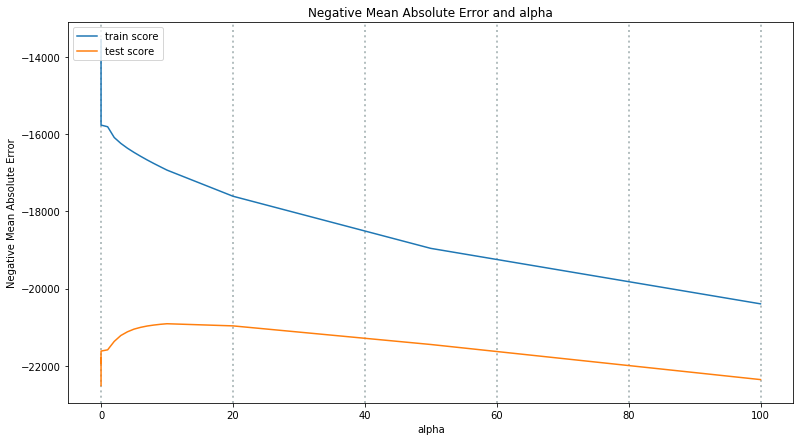

In [71]:
plt.rcParams['figure.figsize'] = (13,7)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='x', alpha=0.7)

plt.show()

In [72]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
from sklearn import metrics
y_trainpred = ridge.predict(X_train)
y_testpred = ridge.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8791289825221509
R2 test 0.8516849734588069


In [73]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
from sklearn import metrics
y_trainpred = ridge.predict(X_train)
y_testpred = ridge.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8684308574051915
R2 test 0.8495248127146974


In [74]:
alpha = 8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
from sklearn import metrics
y_trainpred = ridge.predict(X_train)
y_testpred = ridge.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8722663650480796
R2 test 0.8507588956958652


In [75]:
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
coef_ridge.head()
top_coef_ridge = pd.concat([coef_ridge.sort_values().head(10),coef_ridge.sort_values().tail(10)])
A=pd.DataFrame(top_coef_ridge)
A.columns=["-"]
A.index.names=["variables column"]
A
# bottom 10 and top 10 variables

,-
variables column,
BsmtQual_Gd,-27607.995065
BsmtQual_TA,-26792.626974
Condition2_PosN,-23550.326260
KitchenQual_TA,-23355.780727
OverallQual_5,-21923.398345
OverallQual_4,-21245.263801
KitchenQual_Fa,-19725.389164
OverallQual_6,-19434.440613
Neighborhood_Edwards,-18933.924531


In [76]:
alpha = 16
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
from sklearn import metrics
y_trainpred = ridge.predict(X_train)
y_testpred = ridge.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8588246907123259
R2 test 0.845060138257843


In [77]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
coef_ridge = ridge.coef_
from sklearn import metrics
y_trainpred = ridge.predict(X_train)
y_testpred = ridge.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8534577428683713
R2 test 0.8420338050274484


# According to the graph, the optimal value of alpha for ridge regression is 8 
#### The value of r-squared is best hence bias-variance tradeoff is at optimal values for both train and test data. If the r-squared value is more then the model is better

# Lasso regression

In [78]:
lasso = Lasso()
# crossvalidation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   29.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

### results :

In [79]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.252482,0.011988,0.000000,0.000000,0.0001,{'alpha': 0.0001},-21141.480903,-23112.591609,-22937.215430,-22584.483716,...,-22497.099424,703.211843,25,-13373.409234,-13273.245097,-13677.849617,-14276.611819,-13133.006996,-13546.824552,406.428489
1,0.221897,0.062036,0.000000,0.000000,0.001,{'alpha': 0.001},-21141.235470,-23111.557225,-22936.824018,-22592.050128,...,-22498.242189,703.261378,26,-13373.419018,-13273.257918,-13677.850300,-14276.627278,-13133.009457,-13546.832794,406.431023
2,0.126816,0.010519,0.000201,0.000401,0.01,{'alpha': 0.01},-21138.772018,-23102.592118,-22932.911663,-22651.600572,...,-22506.749082,704.119483,27,-13373.578904,-13273.393542,-13677.960884,-14276.888488,-13133.145499,-13546.993463,406.472355
3,0.159505,0.078591,0.000401,0.000802,0.05,{'alpha': 0.05},-21127.327362,-23063.282749,-22915.513360,-22657.923525,...,-22493.044428,699.844565,24,-13374.402487,-13273.955956,-13678.512847,-14278.110902,-13133.802850,-13547.757008,406.667124
4,0.257924,0.026829,0.006652,0.007365,0.1,{'alpha': 0.1},-21112.992268,-23029.691210,-22896.928265,-22641.966261,...,-22473.080876,695.957866,23,-13375.416927,-13274.820323,-13679.125246,-14279.614585,-13134.764806,-13548.748378,406.847959


## Plotting graph having :
### Y-axis -> "Negative Mean Absolute Error "
### X-axis -> " alpha "

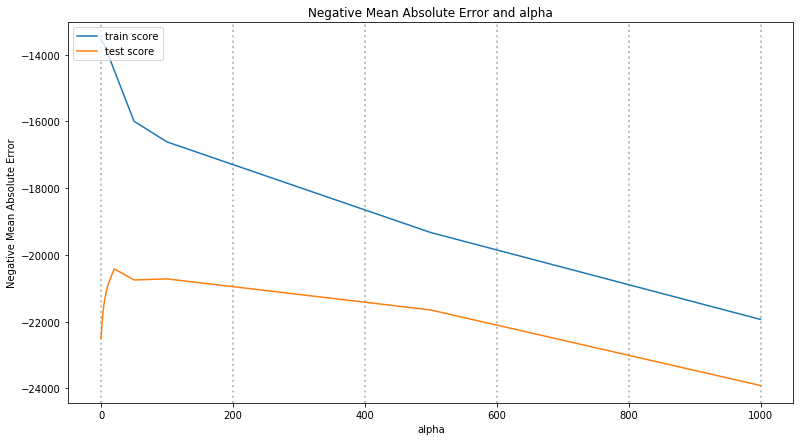

In [80]:
plt.rcParams['figure.figsize'] = (13,7)
# plot mean test-train scoes with the alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(color='#95a5a6', linestyle='dotted', linewidth=2, axis='x', alpha=0.7)

plt.show()

In [81]:
alpha = 50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 5.18796800e-01,  6.05267266e+03, -0.00000000e+00,  1.44226374e+01,
        2.58097730e+01,  1.30616983e+01,  7.72786461e+00, -1.10046270e+01,
       -1.43721593e+03,  5.67503265e+03,  9.49369007e+03,  0.00000000e+00,
        8.73334665e+03,  3.79266427e+01,  1.59428460e+01,  1.38800232e+01,
        7.67869349e+00,  8.63574403e+01,  2.34147659e+01, -1.53397393e+01,
       -3.10465154e-01, -1.84315835e+02, -9.09797846e+02,  2.35064150e+03,
       -2.48790917e+04, -6.27255718e+02,  1.70314424e+03,  1.95971669e+03,
        1.07026937e+04,  1.01371405e+04, -1.28064397e+04, -0.00000000e+00,
       -1.24059283e+03,  8.47110179e+03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -7.77743765e+02,  7.06370192e+03, -1.30192641e+03,
        2.66981614e+04, -1.46347346e+04,  1.03427263e+03, -1.38409777e+04,
       -1.99402821e+04, -1.00855976e+04, -7.02424581e+03,  0.00000000e+00,
        4.24569912e+02,  5.53231302e+04,  1.77996266e+04, -6.42354432e+03,
        1.36801626e+03, -

In [82]:
coef_laso = pd.Series(ridge.coef_,index = X_train.columns)
top_coef_lassoo = pd.concat([coef_laso.sort_values()])
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8922668201511385
R2 test 0.8432886822430051


In [83]:
alpha = 70
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8869076913340823
R2 test 0.8453587285895885


In [84]:
alpha = 90
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8829785772315177
R2 test 0.8465489215124906


In [85]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8808558166091813
R2 test 0.8468418015653888


In [86]:
coef_laso = pd.Series(ridge.coef_,index = X_train.columns)
top_coef_lassoo = pd.concat([coef_laso.sort_values().head(10),coef_laso.sort_values().tail(10)])
A=pd.DataFrame(top_coef_lassoo)
A.columns=["values"]
A.index.names=["variables"]
A
# botom 10 and top 10 variables

,values
variables,
BsmtQual_Gd,-22485.369304
BsmtQual_TA,-20400.359617
KitchenQual_TA,-19335.210612
OverallQual_5,-17421.376787
OverallQual_6,-16532.774852
Neighborhood_Edwards,-15578.051224
OverallQual_4,-15340.339852
KitchenQual_Gd,-14197.318770
KitchenQual_Fa,-12713.221618


In [87]:
alpha = 140
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8727887392406259
R2 test 0.8455492518462533


In [88]:
alpha = 180
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8652465319695659
R2 test 0.8424316741866915


In [89]:
alpha = 200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
from sklearn import metrics
y_trainpred = lasso.predict(X_train)
y_testpred = lasso.predict(X_test)
print("R2 train "+str(metrics.r2_score(y_true = y_train, y_pred = y_trainpred)))
print("R2 test " +str(metrics.r2_score(y_true = y_test, y_pred = y_testpred)))

R2 train 0.8612004954879211
R2 test 0.8404753296587586


# According to the graph the optimal value of alpha for Lasso regression is 100 
#### The value of r-squared is best hence bias-variance tradeoff is at optimal values for both train and test data. If the r-squared value is more then the model is better

## TOP-10 variables on which we have to focus on are :

1. OverallQual_8	
2. Fireplaces	
3. OverallCond_9
4. BsmtExposure_Gd	
5. Neighborhood_Crawfor
6. RoofMatl_WdShngl
7. Neighborhood_NridgHt
8. OverallQual_9	
9. OverallQual_10	
10. Neighborhood_NoRidge